## Text clustering with K-means
In this project we will segment the headlines from ABC for 15 years. The project has some sample data of 20K headlines. However the full dataset is available for the practice and further research. The objective is to identify the possible segments and optimize the K value. Subsequently visualize the segments/clusters formed by the segmentation.

In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


from wordcloud import WordCloud

In [2]:
#Read headlines data
data = pd.read_csv("C:\\Users\\Somesh\\Jupyter_Python\\JBS_Practicals\\Data_Analytics\\news_headlines.csv")
data.head()

,Unnamed: 0,publish_date,headline_text
0,355023,20080106,kibaki offers unified kenyan govt
1,508861,20091223,gp deregistered over depression prescriptions
2,374650,20080404,opposition wants more protection for indigenous
3,958559,20150608,queens birthday honours recognise country
4,549951,20100712,smith wont commit to second term ets


In [3]:
dataSample = data.sample(5000)
dataSample.head()

,Unnamed: 0,publish_date,headline_text
14035,119766,20041006,three palestinians thai killed in gaza
12400,1007609,20160121,city of perth explain gary stevenson sacking c...
16934,212235,20060113,new operator resumes shipping service
15599,846337,20140110,pregnant asylum seekers immigration department...
3903,341852,20071105,hilali an embarrassment to australian muslims


In [4]:
dataSample.columns

Index(['Unnamed: 0', 'publish_date', 'headline_text'], dtype='object')

In [5]:
dataSample['year'] = dataSample['publish_date'].apply(str).str[:4]

In [6]:
dataSample.head()

,Unnamed: 0,publish_date,headline_text,year
14035,119766,20041006,three palestinians thai killed in gaza,2004
12400,1007609,20160121,city of perth explain gary stevenson sacking c...,2016
16934,212235,20060113,new operator resumes shipping service,2006
15599,846337,20140110,pregnant asylum seekers immigration department...,2014
3903,341852,20071105,hilali an embarrassment to australian muslims,2007


In [7]:
# Python program to convert a list 
# of character 
  
def convert(s): 
  
    # initialization of string to "" 
    str1 = "" 
  
    # using join function join the list s by  
    # separating words by str1 
    return(str1.join(s)) 

In [8]:
def plot_wordcloud(wordcloud):
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [9]:
#create some functions for cleaning and counting
def wordfreq(words):
    """Function to generated the frequency distribution of the given text"""
    word_freq={}
    for tok in words:
        if tok.lower() in word_freq:
            word_freq [tok.lower()]+=1
        else:
            word_freq [tok.lower()]=1
        #print(word_freq)
    return word_freq

def sort_tokens(tokens):
    import operator
    sorted_d = sorted(tokens.items(), key=operator.itemgetter(1),reverse=True)
    #print('Dictionary in descending order by value : ',sorted_d)
    #print(sorted_d[:25])
    return(sorted_d)

In [10]:
text = dataSample.headline_text.values
stringtoarray = convert(text)

In [11]:
wordcloud = WordCloud().generate(stringtoarray)

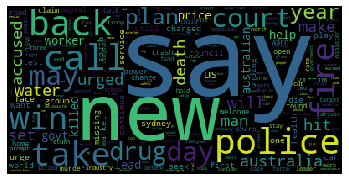

In [12]:
plot_wordcloud(wordcloud)

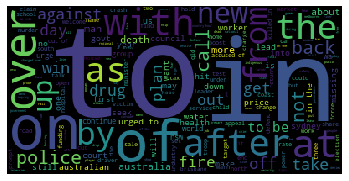

In [13]:
wordcloud = WordCloud(stopwords={'says', 'for','and'}).generate(stringtoarray)
plot_wordcloud(wordcloud)

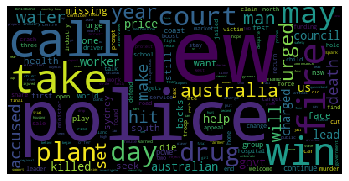

In [14]:
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
stopwords.add("say")
stopwords.add("says")
stopwords.add("over")
stopwords.add("back")
wordcloud = WordCloud(stopwords=stopwords, relative_scaling=1.0).generate(stringtoarray)
plot_wordcloud(wordcloud)

In [15]:
#Get the token
tokens = []
for rec in text:
    tokens.append(rec.split())
stop_words = ['>>>','and','to','the','for', 'is','of', '#','=','a','in','The', 'i', 'I', 'they', 'you', 'i', 'we', 'that', 'have','our', 'it', 'it’s','are','they','but','this', 'not', 'going', 'be', 'he', 'we’re', 'all', 'because']
tokens_clean = []  
for record in tokens:
    for token in record:
        if token.lower() in stop_words:
            pass
        else:
            tokens_clean.append(token.lower())
#print(tokens_clean)  

In [16]:
print(tokens_clean[0:10])

['three', 'palestinians', 'thai', 'killed', 'gaza', 'city', 'perth', 'explain', 'gary', 'stevenson']


In [17]:
new_tokens = wordfreq(tokens_clean)

In [18]:
new_tokens

{'three': 28,
 'palestinians': 2,
 'thai': 8,
 'killed': 35,
 'gaza': 7,
 'city': 15,
 'perth': 17,
 'explain': 2,
 'gary': 5,
 'stevenson': 2,
 'sacking': 1,
 'colin': 5,
 'barnett': 11,
 'says': 98,
 'new': 140,
 'operator': 3,
 'resumes': 6,
 'shipping': 6,
 'service': 18,
 'pregnant': 3,
 'asylum': 18,
 'seekers': 9,
 'immigration': 4,
 'department': 5,
 'practice': 4,
 'change': 25,
 'hilali': 1,
 'an': 42,
 'embarrassment': 1,
 'australian': 53,
 'muslims': 1,
 'brics': 1,
 'launch': 9,
 'development': 9,
 'bank': 16,
 'based': 2,
 'shanghai': 6,
 'minister': 27,
 'disposed': 1,
 'keeping': 4,
 'aust': 14,
 'troops': 18,
 'iraq': 21,
 'wa': 42,
 'alp': 12,
 'party': 19,
 'announcement': 2,
 'abc': 32,
 'childcare': 4,
 'centres': 2,
 'unlikely': 5,
 'close': 10,
 'union': 26,
 'ranger': 2,
 'workers': 34,
 'wary': 2,
 'radiation': 2,
 'tests': 10,
 'stosur': 4,
 'pushing': 1,
 'early': 10,
 'advantage': 2,
 'farm': 11,
 'group': 28,
 'backs': 27,
 'spray': 4,
 'on': 333,
 'pain':

In [19]:
type(new_tokens)

dict

In [20]:
dataComplete = sort_tokens(new_tokens)
#dataComplete

In [21]:
#Sort the dcitionary on the basis of word freuqncy
import operator
sorted_d = sorted(new_tokens.items(), key=operator.itemgetter(1),reverse=True)
#print('Dictionary in descending order by value : ',sorted_d)
print(sorted_d[:25])

[('on', 333), ('over', 198), ('police', 164), ('new', 140), ('with', 129), ('after', 124), ('at', 122), ('man', 111), ('says', 98), ('as', 92), ('up', 91), ('by', 88), ('from', 87), ('court', 79), ('out', 79), ('fire', 78), ('us', 76), ('govt', 75), ('council', 71), ('interview', 68), ('off', 63), ('australia', 61), ('against', 59), ('more', 59), ('death', 58)]


In [22]:
#Create a Pandas dataframe for word frequency
import pandas as pd
word_frequency = pd.DataFrame(dataComplete, columns = ['word', 'frequency'])

In [23]:
#Explore the word frequency
word_frequency.head()

,word,frequency
0,on,333
1,over,198
2,police,164
3,new,140
4,with,129


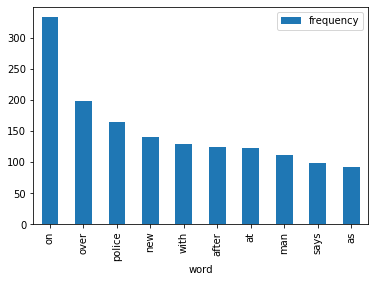

In [24]:
#Plot word frequency of first few words as a bar plot
word_frequency[0:10].plot.bar('word','frequency')

In [25]:
#Transform the data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(dataSample.headline_text.values)
print(X[1])

  (0, 6462)	1
  (0, 737)	1
  (0, 1620)	1
  (0, 6410)	1
  (0, 7066)	1
  (0, 3099)	1
  (0, 2653)	1
  (0, 5427)	1
  (0, 1522)	1


In [26]:
#Transform the data with TfIdf
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(dataSample.headline_text.values)
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[1000:1100])

8306
['bouncer', 'bounces', 'bound', 'boundaries', 'boundary', 'bourke', 'boutique', 'bowen', 'bowl', 'bowler', 'bows', 'bowyer', 'boxer', 'boxers', 'boy', 'boycott', 'boycotted', 'boyd', 'boyle', 'boys', 'bp', 'brabham', 'brace', 'braces', 'bracing', 'brad', 'braddon', 'bradley', 'brady', 'bragging', 'brahman', 'brain', 'brake', 'brakes', 'branch', 'brand', 'branding', 'brandis', 'bransdon', 'brave', 'bravehearts', 'brawl', 'brawls', 'brazil', 'brazilian', 'brazils', 'breach', 'breaching', 'break', 'breakaway', 'breakdown', 'breakdowns', 'breakers', 'breakfast', 'breaking', 'breaks', 'breakthrough', 'breast', 'breathes', 'breed', 'breeding', 'bremer', 'brendon', 'brennan', 'brester', 'bret', 'brethren', 'brett', 'brewers', 'brexit', 'brian', 'bribery', 'brics', 'bridge', 'bridgetown', 'bridgewater', 'brief', 'briefed', 'bright', 'brighton', 'brilliance', 'brind', 'bring', 'brisbane', 'brisbanes', 'brisconnections', 'bristol', 'britain', 'british', 'britons', 'broad', 'broadband', 'bro

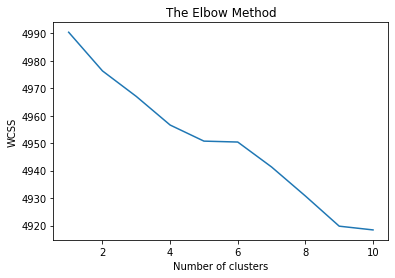

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=100,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [28]:
#Build the clusters
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=50, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=6, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
#Profile the clusters
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
words = []
for i in range(true_k):
    word_list = []
    #print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        #print(' %s' % terms[ind])
        word_list.append(terms[ind])
    words.append(word_list)
df_words = pd.DataFrame(words)
df_words

Top terms per cluster:


,0,1,2,3,4,5,6,7,8,9
0,police,man,court,murder,accused,missing,charges,car,face,case
1,says,abbott,new,mayor,turnbull,union,barnett,government,labor,win
2,new,interview,govt,council,australia,plan,australian,nsw,report,qld
3,death,charged,road,man,toll,murder,police,teenager,teen,custody
4,conference,scott,press,morrison,minister,tedx,regulations,told,australian,party
5,sydney,evacuated,airport,police,western,man,wanderers,unveiled,new,missing


Inferring the groups from the above matrix, we conclude the following segments:

* Cluster 0 - Governament News
* Cluster 1,  Cluster 3, Cluster 4- Crime
* Cluster 2, Cluster 5 - other

In [30]:
#Assign the cluster number to each headline
cluster = model.predict(X)

In [31]:
dataSample['cluster']=cluster

In [32]:
#Inspect the data
dataSample.head()

,Unnamed: 0,publish_date,headline_text,year,cluster
14035,119766,20041006,three palestinians thai killed in gaza,2004,2
12400,1007609,20160121,city of perth explain gary stevenson sacking c...,2016,1
16934,212235,20060113,new operator resumes shipping service,2006,2
15599,846337,20140110,pregnant asylum seekers immigration department...,2014,2
3903,341852,20071105,hilali an embarrassment to australian muslims,2007,2


In [33]:
pd.crosstab(dataSample.cluster, dataSample.year)

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
cluster,,,,,,,,,,,,,,,
0,24,26,11,15,32,23,29,24,23,20,20,15,17,19,8
1,4,8,7,9,7,7,7,5,3,5,7,9,8,7,4
2,260,295,331,251,281,296,310,295,314,382,360,319,333,214,172
3,7,11,6,5,9,13,4,11,9,6,11,5,2,7,5
4,0,4,2,0,2,2,1,1,1,2,3,2,1,3,1
5,0,1,3,3,4,5,1,1,4,4,4,7,5,3,3


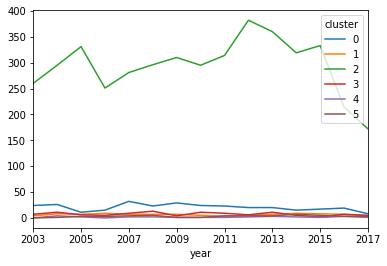

In [34]:
pd.crosstab(dataSample.year,dataSample.cluster).plot()

In [35]:
#Now add the cluster descriptions to data and analyze
import numpy as np
dataSample['Segment'] = np.where(dataSample['cluster']==0, 'Govt', 'Others')

#Inspect the data
dataSample.head()

,Unnamed: 0,publish_date,headline_text,year,cluster,Segment
14035,119766,20041006,three palestinians thai killed in gaza,2004,2,Others
12400,1007609,20160121,city of perth explain gary stevenson sacking c...,2016,1,Others
16934,212235,20060113,new operator resumes shipping service,2006,2,Others
15599,846337,20140110,pregnant asylum seekers immigration department...,2014,2,Others
3903,341852,20071105,hilali an embarrassment to australian muslims,2007,2,Others


In [36]:
#Inspect in a crosstab
pd.crosstab(dataSample.Segment, dataSample.year)

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Segment,,,,,,,,,,,,,,,
Govt,24,26,11,15,32,23,29,24,23,20,20,15,17,19,8
Others,271,319,349,268,303,323,323,313,331,399,385,342,349,234,185


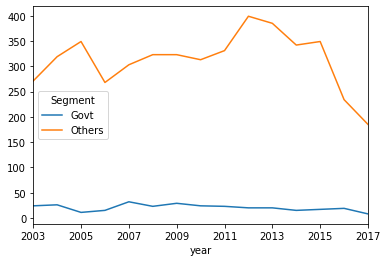

In [37]:
#Inspect in a crosstab in a plot
pd.crosstab(dataSample.year, dataSample.Segment).plot()

In [38]:
#Now add the cluster descriptions to data and analyze
import numpy as np
dataSample['Segment'] = np.where(dataSample['cluster']==0, 'Govt', np.where(dataSample['cluster']==1,'Crime', np.where(dataSample['cluster']==3,'Crime', np.where(dataSample['cluster']==4, 'Crime','Others'))))

#Inspect the data
dataSample.head()

,Unnamed: 0,publish_date,headline_text,year,cluster,Segment
14035,119766,20041006,three palestinians thai killed in gaza,2004,2,Others
12400,1007609,20160121,city of perth explain gary stevenson sacking c...,2016,1,Crime
16934,212235,20060113,new operator resumes shipping service,2006,2,Others
15599,846337,20140110,pregnant asylum seekers immigration department...,2014,2,Others
3903,341852,20071105,hilali an embarrassment to australian muslims,2007,2,Others


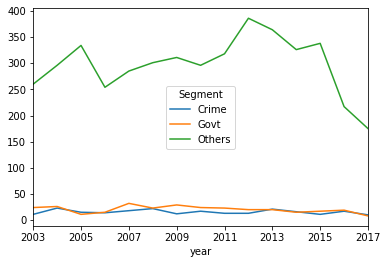

In [39]:
pd.crosstab(dataSample.year,dataSample.Segment).plot()